# 实例9.15-梯度下降法求解一元线性回归

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
x=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,
               106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
y=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,
               62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

learn_rate=0.00001
iter=100

display_step=10

np.random.seed(612)
w=np.random.randn()
b=np.random.randn()

i:0,Loss:3874.243711,w:0.082565,b:-1.161967
i:10,Loss:562.072704,w:0.648552,b:-1.156446
i:20,Loss:148.244254,w:0.848612,b:-1.154462
i:30,Loss:96.539782,w:0.919327,b:-1.153728
i:40,Loss:90.079712,w:0.944323,b:-1.153435
i:50,Loss:89.272557,w:0.953157,b:-1.153299
i:60,Loss:89.171687,w:0.956280,b:-1.153217
i:70,Loss:89.159061,w:0.957383,b:-1.153156
i:80,Loss:89.157460,w:0.957773,b:-1.153101
i:90,Loss:89.157238,w:0.957910,b:-1.153048
i:100,Loss:89.157187,w:0.957959,b:-1.152997


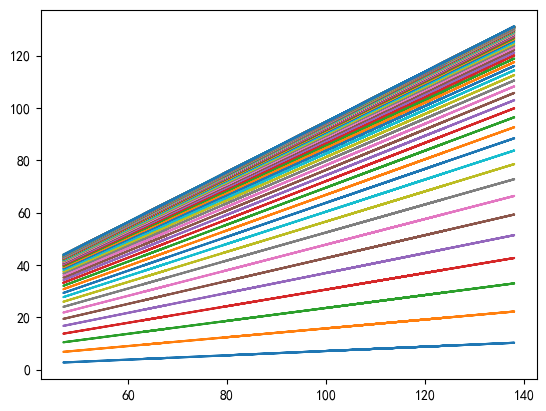

In [56]:
mse=[]

for i in range(0,iter+1):
    dL_dw=np.mean(x*(w*x+b-y))
    dL_db=np.mean(w*x+b-y)
    
    w=w-learn_rate*dL_dw
    b=b-learn_rate*dL_db
    
    pred=w*x+b
    Loss=np.mean(np.square(y-pred)/2)
    
    mse.append(Loss)
    
    plt.plot(x,pred)
    
    if i%display_step==0:
        print("i:%i,Loss:%f,w:%f,b:%f"%(i,mse[i],w,b))

<function matplotlib.pyplot.show(close=None, block=None)>

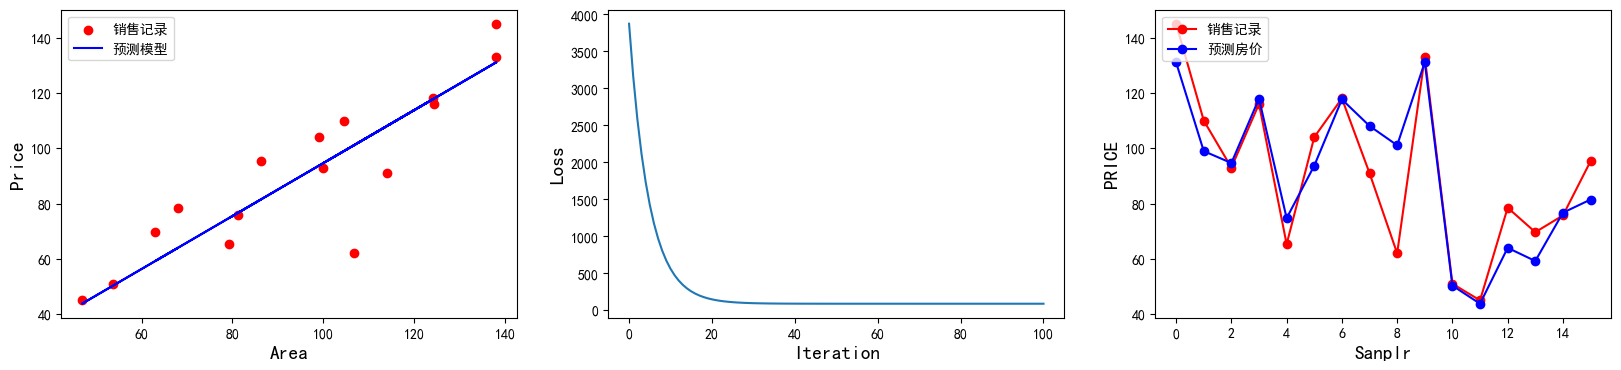

In [57]:
plt.rcParams['font.sans-serif'] = 'SimHei'

plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
plt.scatter(x,y,color="red",label="销售记录")
plt.plot(x,pred,color="blue",label="预测模型")
plt.xlabel("Area",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.legend(loc="upper left")

plt.subplot(1,3,2)
plt.plot(mse)
plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)

plt.subplot(1,3,3)
plt.plot(y,color="red",marker="o",label="销售记录")
plt.plot(pred,color="blue",marker="o",label="预测房价")
plt.xlabel("Sanplr",fontsize=14)
plt.ylabel("PRICE",fontsize=14)
plt.legend(loc="upper left")

plt.show

In [58]:
area=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,
               106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
room=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])
price=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,
               62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

num=len(area)

x0=np.ones(num)

x1=(area-area.min())/(area.max()-area.min())
x2=(room-room.min())/(room.max()-room.min())
print(x1)
print(x2)
X=np.stack((x0,x1,x2),axis=1)
Y=price.reshape(-1,1)

learn_rate=0.001
iter=500

display_step=50

np.random.seed(612)
W=np.random.randn(3,1)

[0.99912223 0.63188501 0.58251042 0.84935264 0.3542901  0.57153829
 0.84584156 0.73612025 0.65591398 1.         0.07504937 0.
 0.23140224 0.17676103 0.37689269 0.43120474]
[1.  0.5 0.5 1.  0.  0.5 1.  0.5 0.5 1.  0.  0.  0.  0.  0.5 0.5]


In [59]:
mse=[]

for i in range(iter+1):
    dL_dW=np.matmul(np.transpose(X),np.matmul(X,W)-Y)
    W=W-learn_rate*dL_dW
    
    PRED=np.matmul(X,W)
    
    Loss=np.mean(np.square(Y-PRED))/2
    mse.append(Loss)
    
    if i%display_step==0:
        print("i:%i,Loss:%f"%(i,mse[i]))

i:0,Loss:4368.213908
i:50,Loss:413.185263
i:100,Loss:108.845176
i:150,Loss:84.920786
i:200,Loss:82.638199
i:250,Loss:82.107310
i:300,Loss:81.782545
i:350,Loss:81.530512
i:400,Loss:81.329266
i:450,Loss:81.167833
i:500,Loss:81.037990


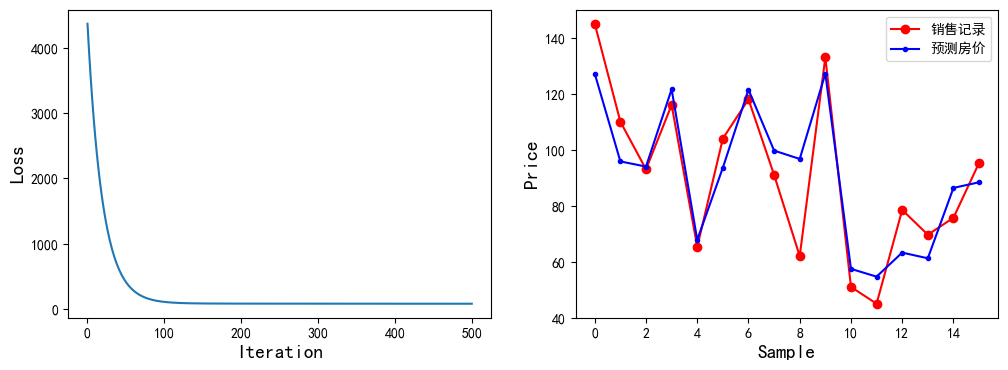

In [60]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(mse)
plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)

plt.subplot(1,2,2)
PRED=PRED.reshape(-1)
plt.plot(price,color="red",marker="o",label="销售记录")
plt.plot(PRED,color="blue",marker=".",label="预测房价")
plt.xlabel("Sample",fontsize=14)
plt.ylabel("Price",fontsize=14)

plt.legend()
plt.show()